<img style="float: left;" src="https://raw.githubusercontent.com/ProjectPythiaCookbooks/radar-cookbook/main/thumbnail.png" width=500>

# ACT Basics: An Overview of the ARM Deployment at Cape Grim

## Overview
The ARM CAPE-k campaign is collecting interesting data in Tasmania, Australia from April 15 2024 - September 15 2025.  Here we look at a case study from November 7 to November 14, 2024.  This notebook will give an introduction to basic features in ACT, using some relevant datastreams from this event

1. Intro to ACT
1. Downloading and Reading in Data
1. Quality Controlling Data
1. Aerosol Instrument Overview
1. Visualizing Data
1. Additional Features in ACT

## Prerequisites
This notebook will rely heavily on Python and the [Atmospheric data Community Toolkit (ACT)](https://github.com/ARM-DOE/ACT).  Don't worry if you don't have experience with either, this notebook will walk you though what you need to know.

You will also need an account and token to download data using the ARM Live webservice.  Navigate to the [webservice information page](https://adc.arm.gov/armlive/) and log in to get your token.  Your account username will be your ARM username.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [ACT](https://github.com/ARM-DOE/ACT) | Helpful | |

- **Time to learn**: 60 Minutes
- **System requirements**:
    - Python 3.11 or latest
    - ACT v1.5.0 or latest
    - numpy
    - xarray
    - matplotlib

---

## Intro to ACT
           
The [Atmospheric data Community Toolkit (ACT)](https://github.com/ARM-DOE/ACT) is an open-source Python toolkit for exploring and analyzing atmospheric time-series datasets.  Examples can be found in the [ACT Example Gallery](https://arm-doe.github.io/ACT/source/auto_examples/index.html).  The toolkit has modules for many different parts of the scientific process, including:

<table style='font-size:100%'>
    <tr>
        <td>
            
#### Data Discovery (act.discovery)
The [discovery](https://arm-doe.github.io/ACT/API/generated/act.discovery.html) module houses functions to download or access data from different groups.  Currently it includes function to get data for ARM, NOAA, EPA, NEON, and more!

#### Input/Output (act.io)
[io](https://arm-doe.github.io/ACT/API/generated/act.io.html) contains functions for reading and writing data from various sources and formats.

#### Visualization (act.plotting)
[plotting](https://arm-doe.github.io/ACT/API/generated/act.plotting.html) contains various routines, built on matplotlib, to help visualize and explore data.  These include 
1. Time-series plots
1. Distribution plots like histograms and heatmaps
1. Geographic plots for moving systems like radiosondes or aircraft
1. Skew-T plots for radiosonde data, built off MetPy
1. Wind rose plots for wind and data roses
1. Cross-section plots for working with 3-dimensional data

#### Corrections (act.corrections)
[corrections](https://arm-doe.github.io/ACT/API/generated/act.corrections.html) apply different corrections to data based on need.  A majority of the existing corrections are for lidar data.

#### Quality Control (act.qc)
The [qc](https://arm-doe.github.io/ACT/API/generated/act.qc.html) module has a lot of functions for working with quality control information, apply new tests, or filtering data based on existing tests.  We will explore some of that functionality in this notebook.

#### Retrievals (act.retrievals)
There are many cases in which some additional calculations are necessary to get more value from the instrument data.  The [retrievals](https://arm-doe.github.io/ACT/API/generated/act.retrievals.html) module houses some functions for performing these advanced calculations.  

#### Utilities (act.utils)
The [utils](https://arm-doe.github.io/ACT/API/generated/act.utils.html) module has a lot of general utilities to help with the data.  Some of these include adding in a solar variable to indicate day/night (useful in filtering data), unit conversions, decoding WMO weather codes, performing weighted averaging, etc...
        </td>
        <td>
            <center>
            <img src="https://arm-doe.github.io/ACT/_images/sphx_glr_plot_neon_001.png" alt="NEON-ARM"></img>
            <figcaption>ARM and NEON data from Utquivaik, AK</figcaption>
            <img src="https://arm-doe.github.io/ACT/_images/sphx_glr_plot_enhanced_skewt_001.png" alt="SONDE"></img>
            <figcaption>Enhanced Skew-T plot from ARM's Southern Great Plains Site (SGP)</figcaption>
            </center>
        </td>
    </tr>
</table>

---

## Imports
Let's get started with some data!  But first, we need to import some libraries.

In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Downloading and Reading ARM's NetCDF Data
ARM's standard file format is NetCDF (network Common Data Form) which makes it very easy to work with in Python!  ARM data are available through a data portal called [Data Discovery](https://adc.arm.gov/discovery/#/) or through a webservice.  If you didn't get your username and token earlier, please go back and see the Prerequisites!

Let's download some of the MPL data first but let's just start with one day.

In [3]:
# Set your username and token here!
username = 'username'
token = 'token'

# Set the datastream and start/enddates
datastream = 'kcgmplpolfsM1.b1'
startdate = '2024-11-10'
enddate = '2024-11-11'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] kcgmplpolfsM1.b1.20241110.000001.nc

If you use these data to prepare a publication, please cite:

Muradyan, P., Cromwell, E., Koontz, A., Coulter, R., Flynn, C., Ermold, B., &
OBrien, J. Micropulse Lidar (MPLPOLFS), 2024-11-10 to 2024-11-11, ARM Mobile
Facility (KCG), kennaook ⁄ Cape Grim, Tasmania, Australia; AMF2 (main site for
CAPE-k) (M1). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1320657



In [4]:
# Let's read in the data using ACT and check out the data
ds_mpl = act.io.read_arm_netcdf(result)

ds_mpl

<xarray.Dataset> Size: 277MB
Dimensions:                          (time: 8640, range_bins: 3990,
                                      num_darkcount_corr: 3990,
                                      num_deadtime_corr: 23,
                                      num_overlap_corr: 669)
Coordinates:
  * time                             (time) datetime64[ns] 69kB 2024-11-10T00...
  * range_bins                       (range_bins) float32 16kB 0.01499 ... 59.81
Dimensions without coordinates: num_darkcount_corr, num_deadtime_corr,
                                num_overlap_corr
Data variables: (12/46)
    base_time                        datetime64[ns] 8B 2024-11-10
    time_offset                      (time) datetime64[ns] 69kB 2024-11-10T00...
    num_channels                     int32 4B ...
    num_bins                         int32 4B ...
    range                            (range_bins) float32 16kB dask.array<chunksize=(3990,), meta=np.ndarray>
    height                           (range_bins) float32 16kB dask.array<chunksize=(3990,), meta=np.ndarray>
    ...                               ...
    qc_signal_return_co_pol          (time) int32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    first_data_bin                   (time) int32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    laser_fire_bin                   (time) int32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    lat                              float32 4B ...
    lon                              float32 4B ...
    alt                              float32 4B ...
Attributes: (12/26)
    command_line:                mplpolfs_ingest -s kcg -f M1
    Conventions:                 ARM-1.3
    process_version:             ingest-mplpolfs-1.24-0.el7
    dod_version:                 mplpolfs-b1-3.1
    input_source:                /data/collection/kcg/kcgmplpolfsM1.00/202411...
    site_id:                     kcg
    ...                          ...
    darkcount_correction_file:   kcgmplpolfsM1_20240301.darkcount_sn_101
    history:                     created by user dsmgr on machine prod-proc3....
    _file_dates:                 ['20241110']
    _file_times:                 ['000001']
    _datastream:                 kcgmplpolfsM1.b1
    _arm_standards_flag:         1

---

## Quality Controlling Data

ARM has multiple methods that it uses to communicate data quality information out to the users.  One of these methods is through "embedded QC" variables.  These are variables within the file that have information on automated tests that have been applied.  Many times, they include Min, Max, and Delta tests but as is the case with the AOS instruments, there can be more complicated tests that are applied.

The results from all these different tests are stored in a single variable using bit-packed QC.  We won't get into the full details here, but it's a way to communicate the results of multiple tests in a single integer value by utilizing binary and bits!  You can learn more about bit-packed QC [here](https://code.arm.gov/docs/QC-flag-examples/-/wikis/home) but ACT also has many of the tools for working with ARM QC.

#### Other Sources of Quality Control
ARM also communicates problems with the data quality through Data Quality Reports (DQR).  These reports are normally submitted by the instrument mentor when there's been a problem with the instrument.  The categories include:

- **Data Quality Report Categories**
    - Missing: Data are not available or set to -9999
    - Suspect: The data are not fully incorrect but there are problems that increases the uncertainty of the values. Data should be used with caution.
    - Bad: The data are incorrect and should not be used.
    - Note: Data notes are a way to communicate information that would be useful to the end user but does not rise to the level of suspect or bad data
    
Examples of [ACT QC functionality](https://arm-doe.github.io/ACT/source/auto_examples/qc/plot_qc_bsrn.html#sphx-glr-source-auto-examples-qc-plot-qc-bsrn-py)
    
Additionally, data quality information can be found in the Instrument Handbooks, which are included on most instrument pages.  Here is an [example](https://www.arm.gov/publications/tech_reports/handbooks/mpl_handbook.pdf) of the MPL handbook.

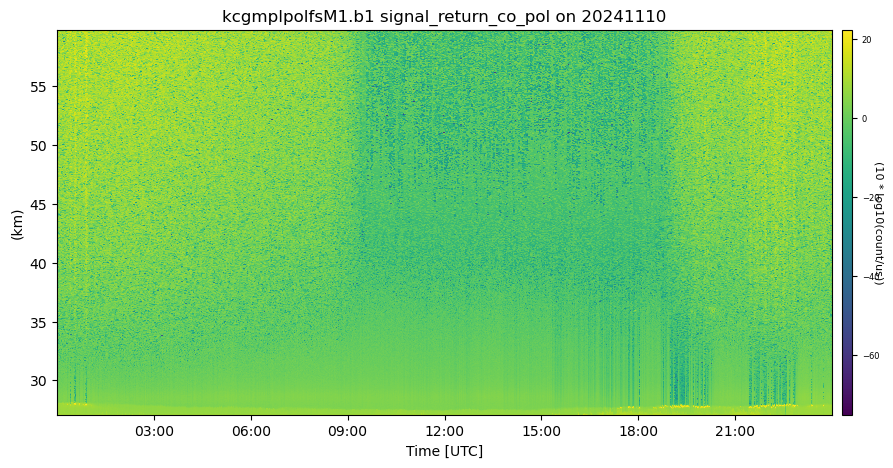

In [5]:
# Let's take a look at the quality control information associated with a variable from the MPL
variable = 'signal_return_co_pol'

# First, for many of the ACT QC features, we need to get the dataset more to CF standard and that
# involves cleaning up some of the attributes and ways that ARM has historically handled QC
ds_mpl.clean.cleanup()

# Apply corrections for the ceilometer, correcting for the vertical height
ds_mpl = act.corrections.correct_mpl(ds_mpl)

# Next, let's take a look at visualizing the quality control information
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_mpl, figsize=(10, 5), subplot_shape=(1,))

# Plot up the variable in the first plot
display.plot(variable, subplot_index=(0,))

# Plot up the QC variable in the second plot
#display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

### Filtering data
It's easy to filter out data failing tests with ACT.  This will show you how to filter data by test or by assessment.

{'long_name': 'Attenuated backscatter, copol', 'units': '10 * log10(count/us)', 'description': 'This field literally contains the counts detected by the detector for each range bin. No corrections of any kind have been applied to this field. In order to make proper use of this data, one should correct for detector non-linearity, subtract background counts, apply a range-squared multiplication, and optimally correct for optical overlap and collimation artifacts.', 'ancillary_variables': 'qc_signal_return_co_pol', 'history': 'act.qc.datafilter: Not used\n act.qc.datafilter: Not used\n act.qc.datafilter: Not used\n act.qc.datafilter: Not used'}


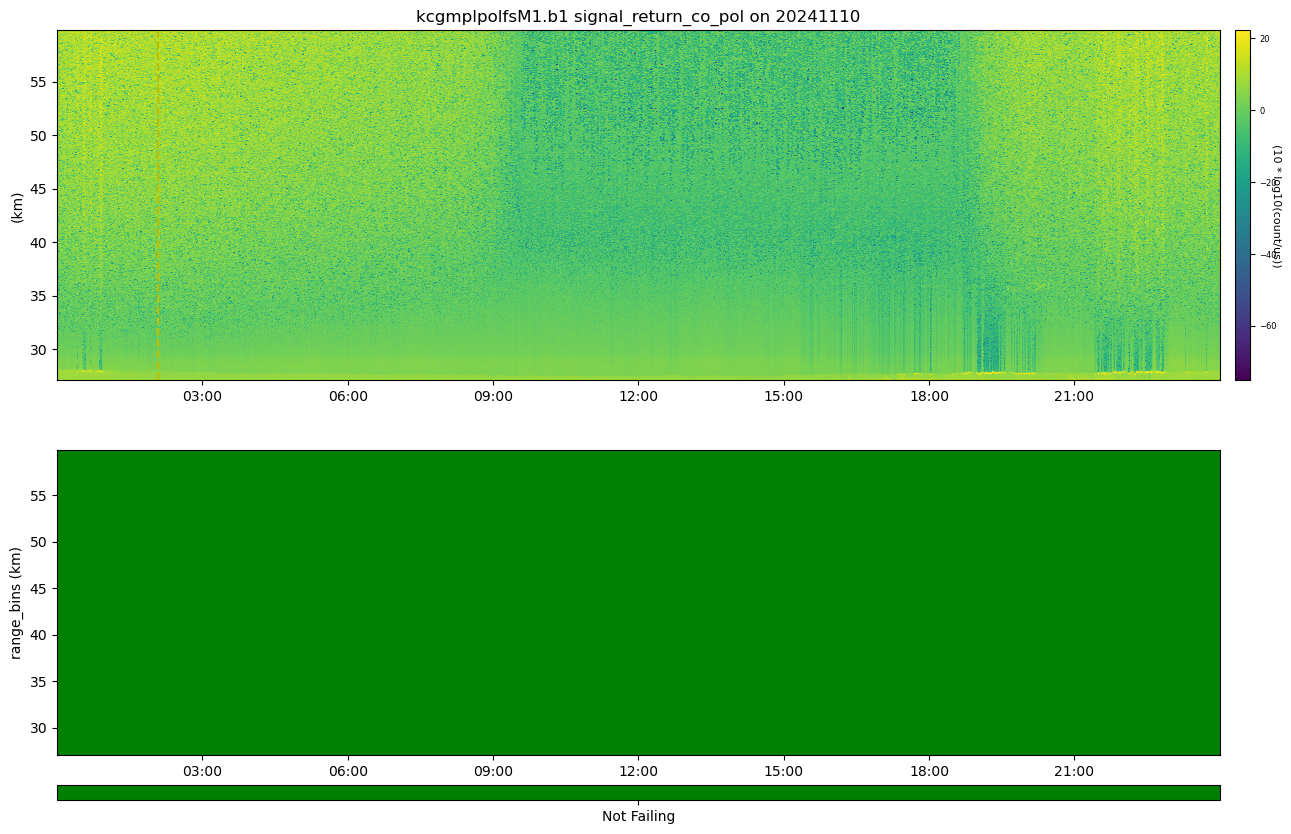

In [7]:
# Let's filter out test 5 using ACT.  Yes, it's that simple!
ds_mpl.qcfilter.datafilter(variable, rm_tests=[1, 2], del_qc_var=False)

# There are other ways we can filter data out as well.  Using the
# rm_assessments will filter out by all Bad/Suspect tests that are failing
# ds.qcfilter.datafilter(variable, rm_assessments=['Bad', 'Suspect'], del_qc_var=False)

# Let's check out the attributes of the variable
# Whenever data are filtered out using the datafilter function
# a comment will be added to the variable history for provenance purposes
print(ds_mpl[variable].attrs)

# And plot it all again!
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_mpl, figsize=(15, 10), subplot_shape=(2,))

# Plot up the variable in the first plot
display.plot(variable, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up the QC variable in the second plot
display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

#### ARM Data Quality Reports (DQR)!
ARM's DQRs can be easily pulled in and added to the QC variables using ACT.  We can do that with the below one line command.  However, for this case, there won't be any DQRs on the data but let's visualize it just in case!  Check out the [ACT QC Examples](https://arm-doe.github.io/ACT/source/auto_examples/index.html#quality-control-examples) for more use cases!

In [8]:
# Query the ARM DQR Webservice
ds_mpl = act.qc.add_dqr_to_qc(ds_mpl, variable=variable)

ds_mpl['qc_' + variable]

<xarray.DataArray 'qc_signal_return_co_pol' (time: 8640, range_bins: 2184)> Size: 75MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * time        (time) datetime64[ns] 69kB 2024-11-10T00:00:01 ... 2024-11-10...
  * range_bins  (range_bins) float32 9kB 27.09 27.1 27.12 ... 59.78 59.79 59.81
Attributes:
    long_name:         Quality check results on variable: Attenuated backscat...
    units:             1
    standard_name:     quality_flag
    flag_masks:        [np.uint32(1), np.uint32(2), np.uint32(4), np.uint32(8...
    flag_meanings:     [np.str_('Not used'), np.str_('Not used'), np.str_('No...
    flag_assessments:  [np.str_('Bad'), np.str_('Bad'), np.str_('Bad'), np.st...
    missing_value:     4294957297

---

## Aerosol Instrument Overview
<table>
    <tr>
        <td>

### Single Particle Soot Photometer (SP2)
The single-particle soot photometer (SP2) measures the soot (black carbon) mass of individual aerosol particles by laser-induced incandescence down to concentrations as low as ng/m^3. [Learn more](https://arm.gov/capabilities/instruments/sp2)

### Aerodynamic Particle Sizer (APS)
The aerodynamic particle sizer (APS) is a particle size spectrometer that measures both the particle aerodynamic diameter based on particle time of flight and optical diameter based on scattered light intensity. The APS provides the number size distribution for particles with aerodynamic diameters from 0.5 to 20 micrometers and with optical diameters from 0.3 to 20 micrometers. [Learn more](https://arm.gov/capabilities/instruments/aps)

### Aerosol Chemical Speciation Monitor (ACSM)
The aerosol chemical speciation monitor is a thermal vaporization, electron impact, ionization mass spectrometer that measures bulk chemical composition of the rapidly evaporating component of sub-micron aerosol particles in real time. Standard measurements include mass concentrations of organics, sulfate, nitrate, ammonium, and chloride. [Learn more](https://arm.gov/capabilities/instruments/acsm)
        </td>
        <td width=600>
            <center>
            <img src="aerosol_sizing.png" width=600>
            <figcaption>ARM Aerosol Instrumentation Particle Size Ranges</figcaption>
            </center>
        </td>
    </tr>
</table>

### Downloading and QCing the Aerosol Data
Let's start pulling these data together into the same plots so we can see what's going on.

In [21]:
# Let's set a longer time period
startdate = '2024-11-07'
enddate = '2024-11-14'

# aps
datastream = 'kcgaosapsS3.b1'
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_aps = act.io.arm.read_arm_netcdf(result)

[DOWNLOADING] kcgaosapsS3.b1.20241113.000000.nc
[DOWNLOADING] kcgaosapsS3.b1.20241107.000000.nc
[DOWNLOADING] kcgaosapsS3.b1.20241111.000000.nc
[DOWNLOADING] kcgaosapsS3.b1.20241108.000000.nc
[DOWNLOADING] kcgaosapsS3.b1.20241109.000000.nc
[DOWNLOADING] kcgaosapsS3.b1.20241110.000000.nc
[DOWNLOADING] kcgaosapsS3.b1.20241112.000000.nc

If you use these data to prepare a publication, please cite:

Singh, A., Oliveira, D., Koontz, A., Sedlacek, A., & Kuang, C. Aerodynamic
Particle Sizer (AOSAPS), 2024-11-07 to 2024-11-14, ARM Mobile Facility (KCG),
kennaook  ⁄  Cape Grim, Tasmania, Australia; Supplementary Facility 3 (S3).
Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1407135



In [19]:
# AOSMET - Just to get the wind data!
datastream = 'kcgaosmetS2.a1'
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_met = act.io.read_arm_netcdf(result)

# MPL to get the full record
datastream = 'kcg30smplcmask1zwangM1.c1'
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_mpl = act.io.read_arm_netcdf(result)

[DOWNLOADING] kcgaosmetS2.a1.20241111.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20241107.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20241109.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20241113.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20241110.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20241112.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20241108.000000.nc

If you use these data to prepare a publication, please cite:

Kyrouac, J., & Tuftedal, M. Meteorological Measurements associated with the
Aerosol Observing System (AOSMET), 2024-11-07 to 2024-11-14, ARM Mobile Facility
(KCG), kennaook ⁄ Cape Grim, Tasmania, Australia; Supplementary Facility 2 (S2).
Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1984920

[DOWNLOADING] kcg30smplcmask1zwangM1.c1.20241111.000002.nc
[DOWNLOADING] kcg30smplcmask1zwangM1.c1.20241107.000008.nc
[DOWNLOADING] kcg30smplcmask1zwangM1.c1.20241110.000001.nc
[DOWNLOADING] kcg30smplcmask1zwangM1.c1.20241112.000003.nc
[DOWNLOADING] kcg30smplcmask1zwangM1.c1

In [22]:
# Before we proceed to plotting, let's reduce the MPL data down a little bit
# This will remove all data where heights are greater than 5
ds_mpl = ds_mpl.where(ds_mpl.height <= 3, drop=True)

# This will resample to 1 minute
ds_mpl = ds_mpl.resample(time='1min').nearest()

In [24]:
# Let's not forget about QCing the data!
# We can remove all the bad data from each aerosol dataset

ds_aps.clean.cleanup()
ds_aps = act.qc.arm.add_dqr_to_qc(ds_ccn)
ds_aps.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

ds_met.clean.cleanup()
ds_met = act.qc.arm.add_dqr_to_qc(ds_met)
ds_met.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

ds_mpl.clean.cleanup()
ds_mpl = act.qc.arm.add_dqr_to_qc(ds_mpl)
ds_mpl.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

In [41]:
ds_aps

<xarray.Dataset> Size: 1GB
Dimensions:                           (time: 603354, bound: 2,
                                       diameter_aerodynamic: 51)
Coordinates:
  * time                              (time) datetime64[ns] 5MB 2024-11-07T00...
  * diameter_aerodynamic              (diameter_aerodynamic) float32 204B 0.5...
Dimensions without coordinates: bound
Data variables: (12/38)
    base_time                         (time) datetime64[ns] 5MB 2024-11-07 .....
    time_offset                       (time) datetime64[ns] 5MB 2024-11-07T00...
    time_bounds                       (time, bound) object 10MB dask.array<chunksize=(86032, 2), meta=np.ndarray>
    diameter_aerodynamic_bounds       (time, diameter_aerodynamic, bound) float32 246MB dask.array<chunksize=(86032, 51, 2), meta=np.ndarray>
    dN_dlogDp                         (time, diameter_aerodynamic) float32 123MB dask.array<chunksize=(86399, 51), meta=np.ndarray>
    qc_dN_dlogDp                      (time, diameter_aerodynamic) int32 123MB dask.array<chunksize=(86032, 51), meta=np.ndarray>
    ...                                ...
    avalanche_photodiode_voltage      (time) float32 2MB dask.array<chunksize=(86032,), meta=np.ndarray>
    sheath_pump_voltage               (time) float32 2MB dask.array<chunksize=(86032,), meta=np.ndarray>
    status_flags                      (time) int32 2MB 0 0 0 0 0 0 ... 0 0 0 0 0
    lat                               (time) float32 2MB -40.68 ... -40.68
    lon                               (time) float32 2MB 144.7 144.7 ... 144.7
    alt                               (time) float32 2MB 67.0 67.0 ... 67.0 67.0
Attributes: (12/21)
    command_line:            aosapscorr -s kcg -f S3
    Conventions:             ARM-1.3
    process_version:         ingest-aosapscorr-1.6-0.el7
    dod_version:             aosaps-b1-1.2
    input_datastreams:       kcgaosapsS3.a0 : 1.9 : 20241107.000000
    site_id:                 kcg
    ...                      ...
    doi:                     10.5439/1407135
    history:                 created by user dsmgr on machine prod-proc2.adc....
    _file_dates:             ['20241107', '20241108', '20241109', '20241110',...
    _file_times:             ['000000', '000000', '000000', '000000', '000000...
    _datastream:             kcgaosapsS3.b1
    _arm_standards_flag:     1

---

## Visualizing Data
We have all the datasets downloaded, let's start to visualize them in different ways using ACT.
If you ever need a place to start with how to visualize data using ACT, check out the 
[ACT Plotting Examples](https://arm-doe.github.io/ACT/source/auto_examples/index.html#plotting-examples)

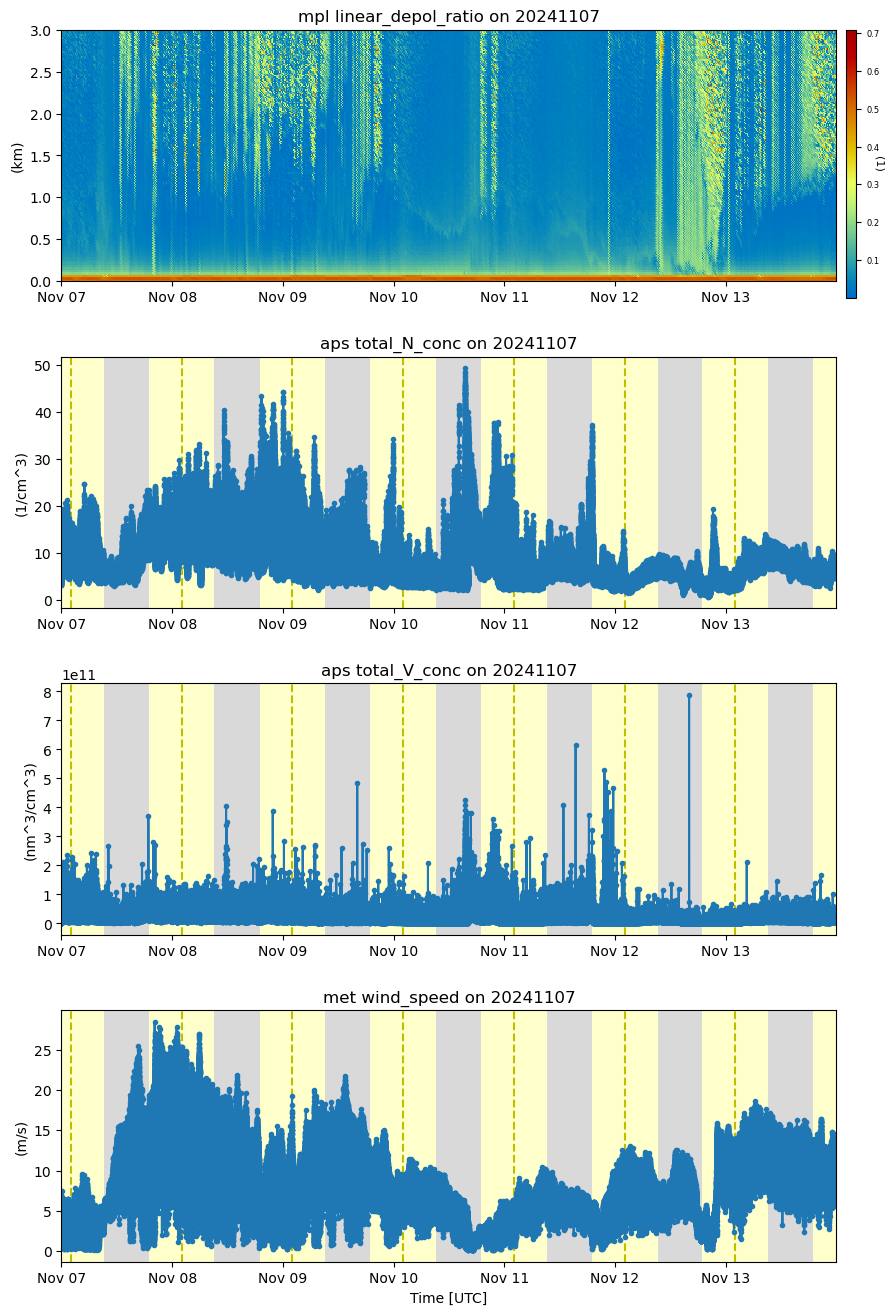

In [33]:
# We can pass a dictionary to the display objects with multiple datasets
# So let's plot all this up!
display = act.plotting.TimeSeriesDisplay({'mpl': ds_mpl, 'aps': ds_aps, 'met': ds_met},
                                         subplot_shape=(4,), figsize=(10,16))

# MPL Plot
# Variable names of interest linear_depol_ratio, linear_depol_snr, backscatter_snr
display.plot('linear_depol_ratio', dsname='mpl', subplot_index=(0,), cmap='HomeyerRainbow')
display.set_yrng([0, 3], subplot_index=(0,))

# CNN Plot
display.plot('total_N_conc', dsname='aps', subplot_index=(1,))
display.day_night_background(dsname='aps', subplot_index=(1,))

# CNN-kappa Plot
display.plot('total_V_conc', dsname='aps', subplot_index=(2,))
display.day_night_background(dsname='aps', subplot_index=(2,))

# MET Plot
display.plot('wind_speed', dsname='met', subplot_index=(3,))
display.day_night_background(dsname='met', subplot_index=(3,))

plt.subplots_adjust(hspace=0.3)
plt.savefig('output.png')
plt.show()

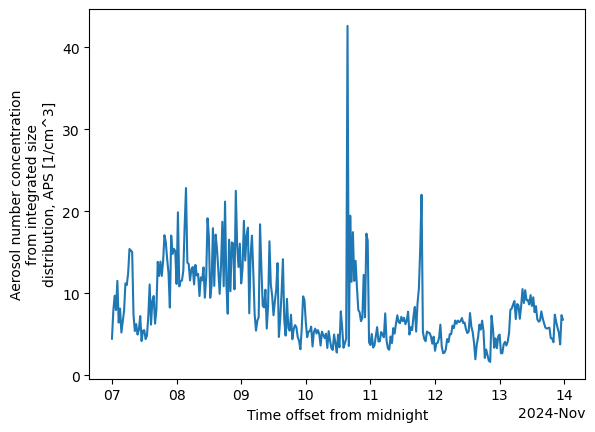

In [39]:
ds_combined.total_N_conc.plot()

### Data Rose Plots
These plots display the data on a windrose-like plot to visualize directional dependencies in the data.

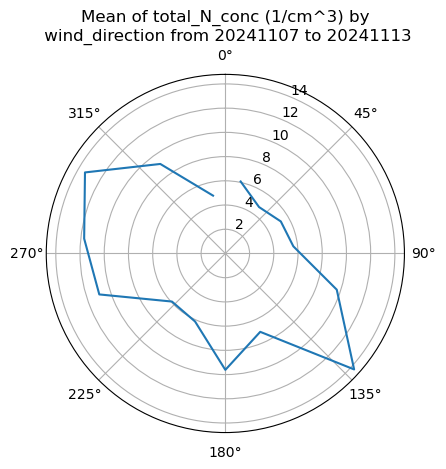

In [40]:
# We already should have the data loaded up so let's explore with some data roses
# First we need to combine data and to do that, we need to get it on the same time grid
ds_combined = xr.merge([ds_met.resample(time='30min').nearest(), ds_aps.resample(time='30min').nearest()], compat='override')

# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)
display.plot_data('wind_direction', 'wind_speed', 'total_N_conc', num_dirs=15, plot_type='line', line_plot_calc='mean')
plt.show()

### Checkout the area
The AMF is deployed in [at the Cape Grim site](https://www.google.com/maps/place/-40.680779,144.68984).  Check out the google map and see if this mapes sense!

### Back to the visualizations!
Let's get back to checking out the other visualization features in ACT!

#### Histograms

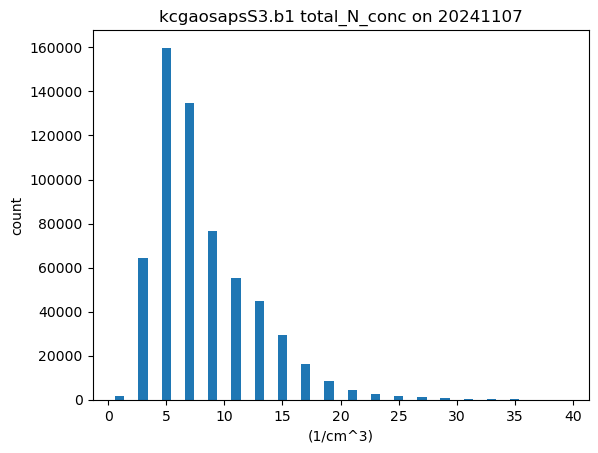

In [47]:
# We do the same thing as before but call the DistributionDisplay class
display = act.plotting.DistributionDisplay(ds_ccn)

# And then we can plot the data!  Note that we are passing a range into the
# histogram function to set the min/max range of the data
display.plot_stacked_bar('total_N_conc', bins=20, hist_kwargs={'range': [0, 40]})
plt.show()

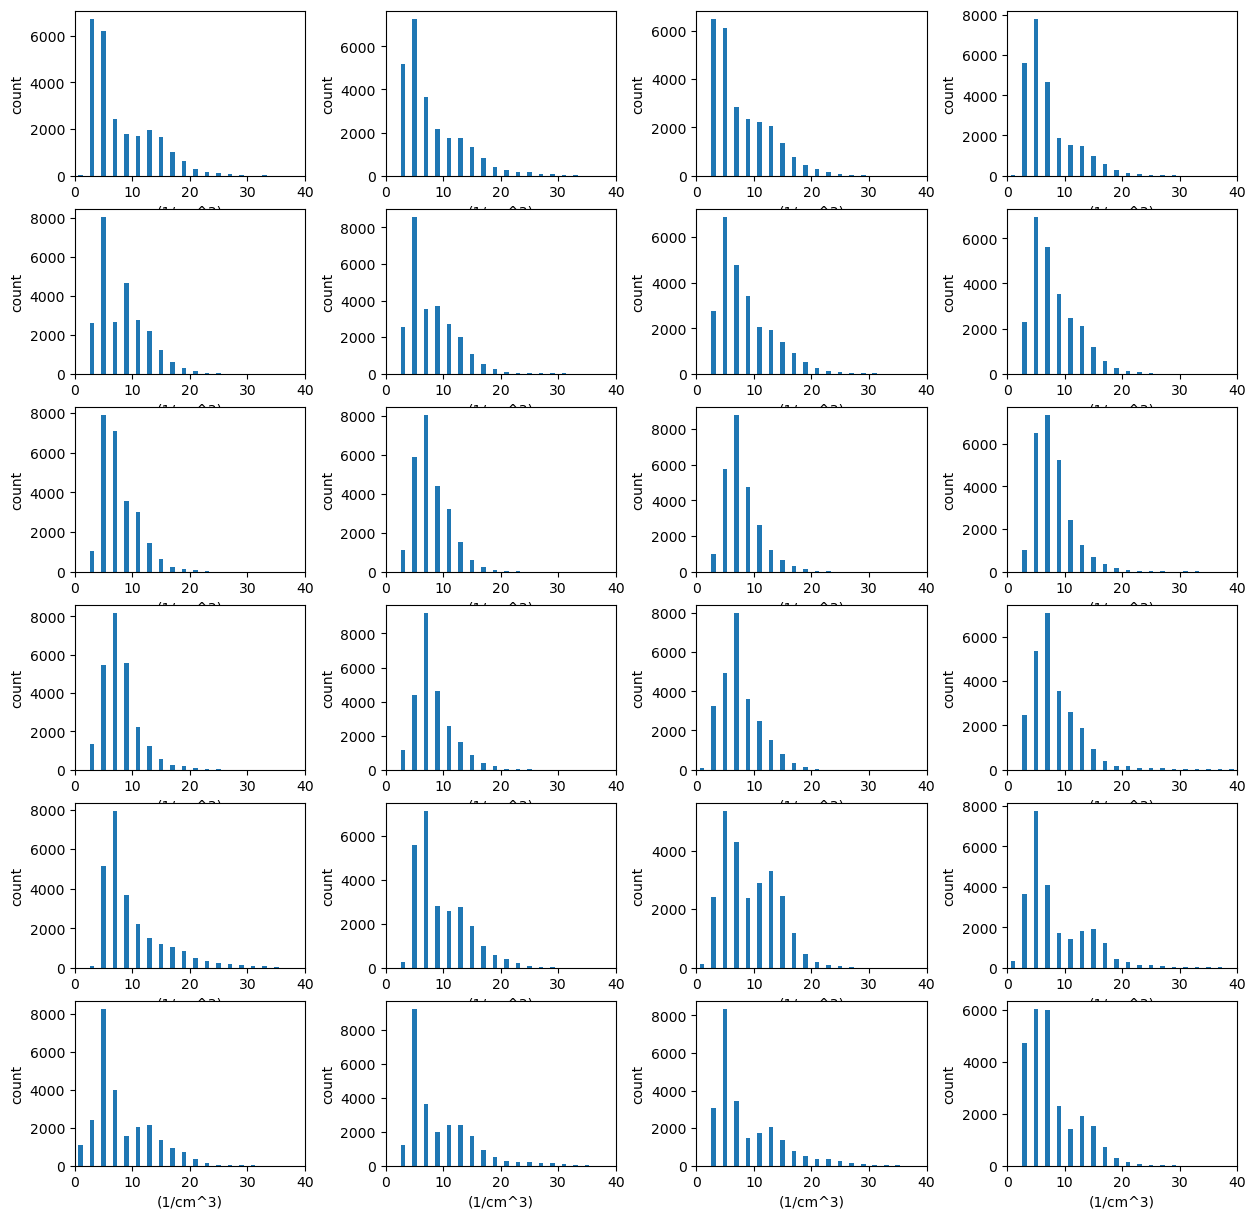

In [48]:
# We can create these plots in groups as well but we need to know
# how many there will be ahead of time for the shape
display = act.plotting.DistributionDisplay(ds_aps, figsize=(15, 15), subplot_shape=(6, 4))
groupby = display.group_by('hour')

# And then we can plot the data in groups!  The main issue is that it doesn't automatically
# Annotate the group on the plot.  We're also setting the titile to blank to save space
groupby.plot_group('plot_stacked_bar', None, field='total_N_conc', set_title='', bins=20, hist_kwargs={'range': [0, 40]})

# We want these graphs to have the same axes, so we can easily run through
# each plot and modify the axes.  Right now, we can just hard code these in
for i in range(len(display.axes)):
    for j in range(len(display.axes[i])):
        display.axes[i, j].set_xlim([0, 40])
        
plt.subplots_adjust(wspace=0.35)
        
plt.show()

#### Scatter Plots and Heatmaps

Let's plot up a comparison of the APS total concentration and the ACSM sulfates.  Feel free to change the variables from the ACSM to experiment!

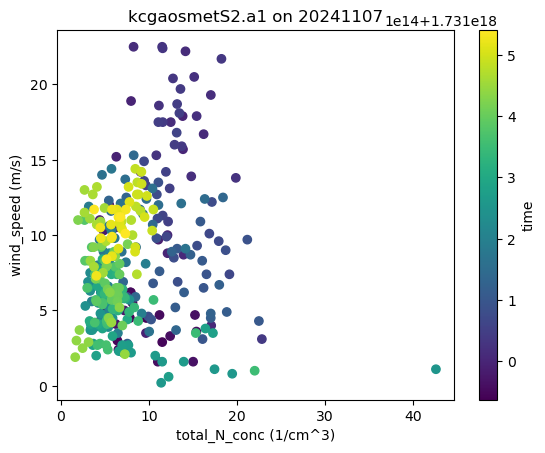

In [55]:
# Let's merge the aps and ACSM data together and plot out some distribution plots
# First we need to combine data and to do that, we need to get it on the same time grid
ds_combined = xr.merge([ds_met.resample(time='30min').nearest(), ds_aps.resample(time='30min').nearest()], compat='override')

# Plot out the data rose using the Distribution display object
display = act.plotting.DistributionDisplay(ds_combined)
display.plot_scatter('total_N_conc', 'wind_speed', m_field='time')

plt.show()

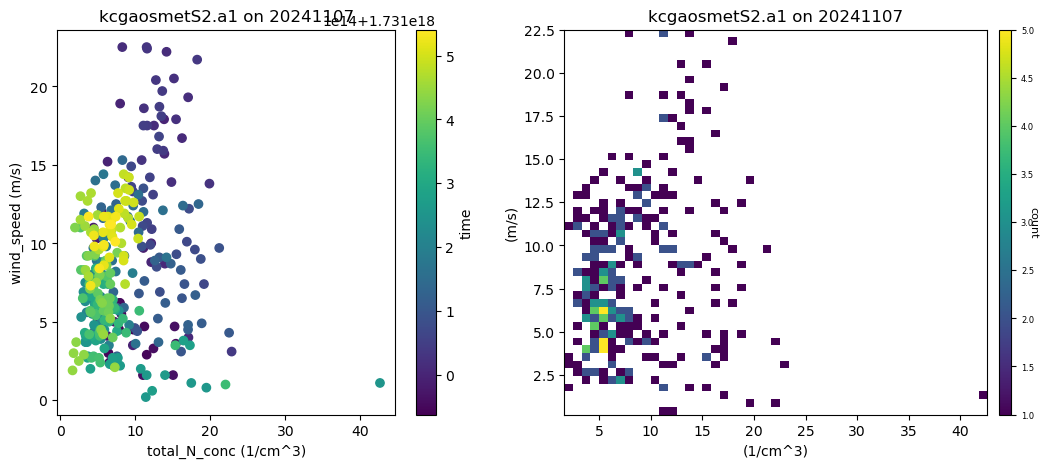

In [52]:
# Let's try a heatmap with this as well!
display = act.plotting.DistributionDisplay(ds_combined, figsize=(12, 5), subplot_shape=(1, 2))

display.plot_scatter('total_N_conc', 'wind_speed', m_field='time', subplot_index=(0, 0))
display.plot_heatmap('total_N_conc', 'wind_speed', subplot_index=(0, 1), x_bins=50, y_bins=50, threshold=0)

plt.show()

### Create a Visualization of the Number Concentration by Size
One of the other dimensions of the CCN dataset is by the size, in nanometers, ranging from 1 to 19 micrometers. To plot this, we can create new variables in the dataset, then create a loop to plot these.

In [62]:
for diameter in ds_aps.diameter_aerodynamic.values:
    ds_aps[f"dN_dlogDp_{diameter}"] = ds_aps["dN_dlogDp"].sel(diameter_aerodynamic=diameter)

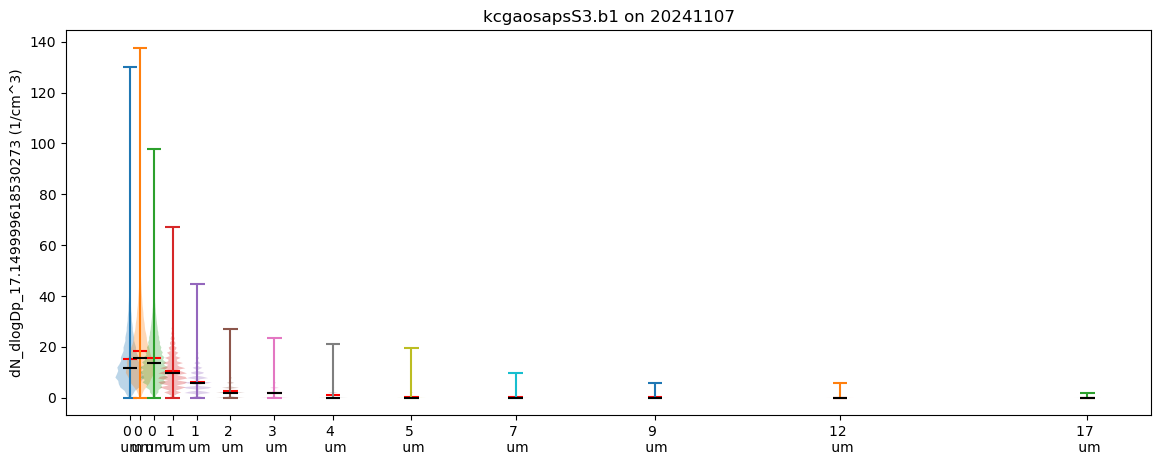

In [68]:
# Let's try one last plot type with this dataset
# Violin plots!
display = act.plotting.DistributionDisplay(ds_aps, figsize=(14, 5))

diameters_to_use = ds_aps.diameter_aerodynamic.values[::4]
for diameter in diameters_to_use:
    display.plot_violin(f"dN_dlogDp_{diameter}", positions=[diameter])

# Let's add some more information to the plots
# Update the tick information
display.axes[0].set_xticks(diameters_to_use)
display.axes[0].set_xticklabels([f"{int(value)} \n um" for value in list(diameters_to_use)])

plt.show()

## Additional Features in ACT
If there's time to explore more features or if you want to on your own time, these are some of the many additional
features that you might find useful in ACT

### Skew-T Plots

[DOWNLOADING] kcgsondewnpnM1.b1.20241108.113000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241108.053000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241109.233000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241112.113000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241109.173000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241113.113000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241109.053000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241109.113000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241110.113000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241112.053000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241110.053000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241107.113000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241107.233000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241108.173000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241111.233000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241113.233000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241110.173000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241111.173000.cdf
[DOWNLOADING] kcgsondewnpnM1.b1.20241111.053000.cdf
[DOWNLOADING

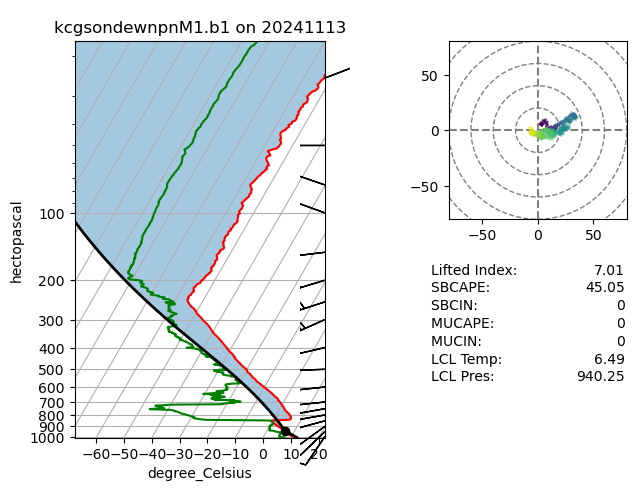

In [69]:
# Let's set a longer time period
startdate = '2024-11-07'
enddate = '2024-11-14'

# SONDE
datastream = 'kcgsondewnpnM1.b1'
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()
ds_sonde = act.io.read_arm_netcdf(result[-1])

# Plot enhanced Skew-T plot
display = act.plotting.SkewTDisplay(ds_sonde)
display.plot_enhanced_skewt(color_field='alt')

plt.show()

---

### Wind Roses

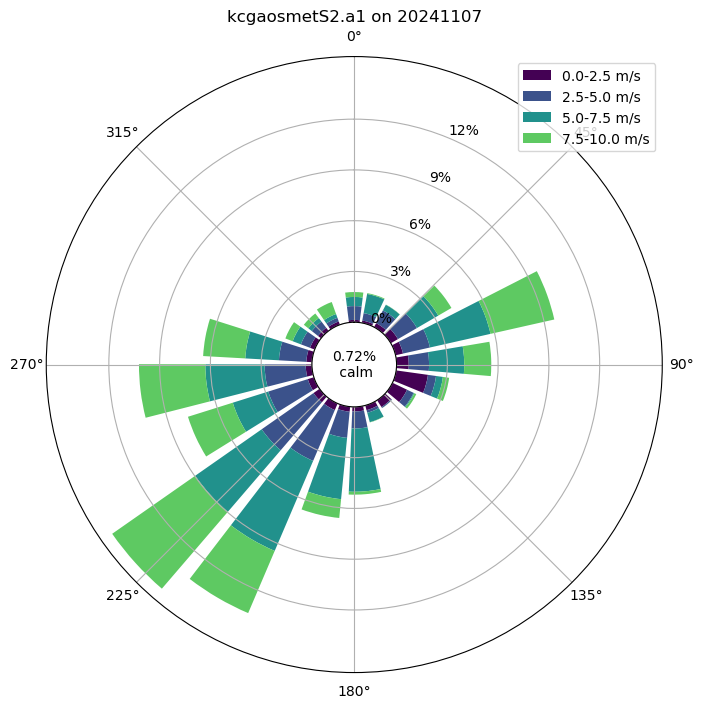

In [70]:
# Now we can plot up a wind rose of that entire month's worth of data
windrose = act.plotting.WindRoseDisplay(ds_met, figsize=(10,8))
windrose.plot('wind_direction', 'wind_speed', spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.show()

In [72]:
ds_met

<xarray.Dataset> Size: 51MB
Dimensions:              (time: 604795)
Coordinates:
  * time                 (time) datetime64[ns] 5MB 2024-11-07T00:00:00.270000...
Data variables: (12/17)
    base_time            (time) datetime64[ns] 5MB 2024-11-07 ... 2024-11-13
    time_offset          (time) datetime64[ns] 5MB 2024-11-07T00:00:00.270000...
    rh_ambient           (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    temperature_ambient  (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    pressure_ambient     (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    wind_speed           (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    ...                   ...
    heater_volts         (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    supply_volts         (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    ref_volts            (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    lat                  (time) float32 2MB -40.68 -40.68 ... -40.68 -40.68
    lon                  (time) float32 2MB 144.7 144.7 144.7 ... 144.7 144.7
    alt                  (time) float32 2MB 74.0 74.0 74.0 ... 74.0 74.0 74.0
Attributes: (12/21)
    command_line:                aosmet_ingest -s kcg -f S2
    Conventions:                 ARM-1.3
    process_version:             ingest-aosmet-1.2-0.el7
    dod_version:                 aosmet-a1-3.0
    input_source:                /data/collection/kcg/kcgaosmetS2.00/kcgaosS3...
    site_id:                     kcg
    ...                          ...
    doi:                         10.5439/1325987
    history:                     created by user dsmgr on machine prod-proc4....
    _file_dates:                 ['20241107', '20241108', '20241109', '202411...
    _file_times:                 ['000000', '000000', '000000', '000000', '00...
    _datastream:                 kcgaosmetS2.a1
    _arm_standards_flag:         1

---

### Accumulating Precipitation
This example shows how to accumulate precipitation using the ACT utility and then overplot the PWD present weather codes

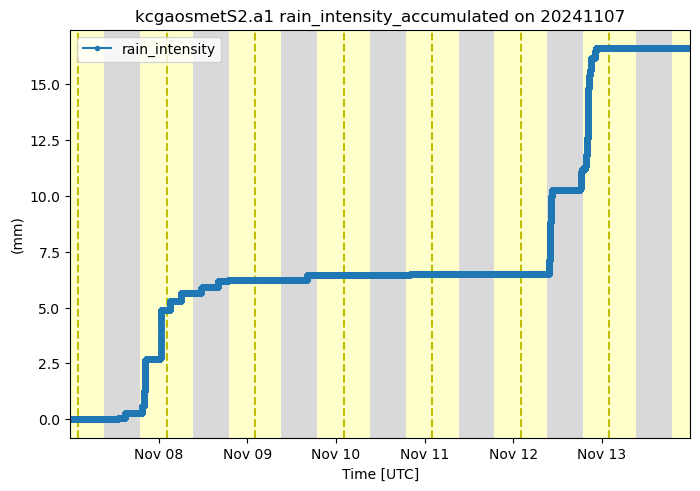

In [74]:
# Let's accumulate the precipitation data from the three different sensors in the MET System
# These instruments include a tipping bucket rain gauge, optical rain gauge, and a present weather detector
ds_met = act.utils.data_utils.accumulate_precip(ds_met, "rain_intensity")

# We can plot them out easily in a loop.  Note, they have _accumulated on the end of the name
display = act.plotting.TimeSeriesDisplay(ds_met, figsize=(8, 6))
display.plot('rain_intensity_accumulated', label="rain_intensity")

# Add a day/night background
display.day_night_background()
plt.subplots_adjust(bottom=0.20)
plt.legend()
plt.show()

---

### Doppler Lidar Wind Retrievals
This will show you how you can process the doppler lidar PPI scans to produce __[wind profiles](https://arm-doe.github.io/ACT/API/generated/act.retrievals.compute_winds_from_ppi.html#act.retrievals.compute_winds_from_ppi)__ based on Newsom et al 2016.   

In [76]:
# We're going to use some test data that already exists within ACT
# Let's set a longer time period
startdate = '2024-11-10T00:00:00'
enddate = '2024-11-10T06:00:00'

# SONDE
datastream = 'kcgdlppiM1.b1'
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()

[DOWNLOADING] kcgdlppiM1.b1.20241110.013523.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.054540.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.032530.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.042534.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.012522.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.050538.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.033531.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.021526.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.010521.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.034532.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.053540.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.014524.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.052539.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.043536.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.045537.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.055541.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.002516.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.024528.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.040534.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.011522.cdf
[DOWNLOADING] kcgdlppiM1.b1.20241110.051

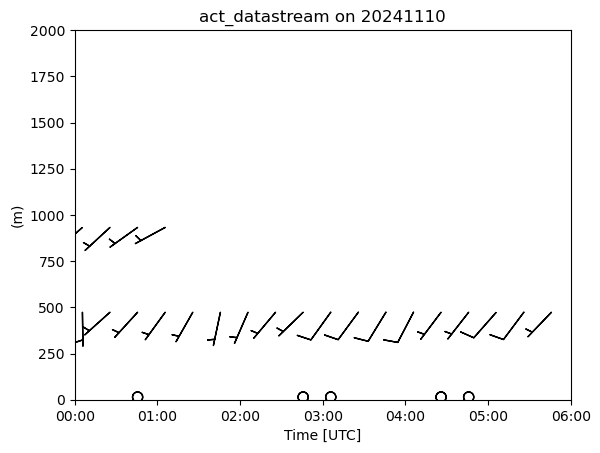

In [78]:
ds = act.io.read_arm_netcdf(result)
ds
# Returns the wind retrieval information in a new object by default
# Note that the default snr_threshold of 0.008 was too high for the first profile
# Reducing it to 0.002 makes it show up but the quality of the data is likely suspect.
ds_wind = act.retrievals.compute_winds_from_ppi(ds, snr_threshold=0.01)

# Plot it up
display = act.plotting.TimeSeriesDisplay(ds_wind)
display.plot_barbs_from_spd_dir('wind_speed', 'wind_direction', invert_y_axis=False)

#Update the x-limits to make sure both wind profiles are shown
display.axes[0].set_xlim([np.datetime64(startdate), np.datetime64(enddate)])

plt.ylim(0, 2000)

plt.show()

---